# Car Price Prediction

## Objective

- To predict the market value of a car based on various factors 
- that is Company, Model_name , Year, kms_driven, fuel_type.
- It will help buyers to make decisions about purchasing a car 
- and sellers can set the right price for their vehicle to attract potential buyers.
- It will provide a common platform and standard price in the car market for fair deal 
- as both buyers and sellers can have a better understanding of the true value of a vehicle.

 ### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [2]:
#import the Dataset
cars = pd.read_csv(r"C:\Users\hp\Downloads\quikr_car.csv")

### EDA

In [3]:
# display the DataFrame
cars.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
cars.shape

(892, 6)

In [5]:
cars.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## Observations
- Here we can see number of rows in the dataset are 892 
- but the value count in column kms_driven and fuel_type is 840 & 837 respectively
- that means missing values are there in this variables
- Also datatype of variable year,vkms driven and price should be integer
so Data cleaning is required

In [7]:
#here we have checked the exact count of missing values
cars.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [8]:
#Check unique values in Dataset
for i in cars:
    print("Unique values in ",i)
    print(cars[i].unique())
    print("-----------------------------------------------------------------------------------------------------------------------")

Unique values in  name
['Hyundai Santro Xing XO eRLX Euro III' 'Mahindra Jeep CL550 MDI'
 'Maruti Suzuki Alto 800 Vxi' 'Hyundai Grand i10 Magna 1.2 Kappa VTVT'
 'Ford EcoSport Titanium 1.5L TDCi' 'Ford Figo' 'Hyundai Eon'
 'Ford EcoSport Ambiente 1.5L TDCi' 'Maruti Suzuki Alto K10 VXi AMT'
 'Skoda Fabia Classic 1.2 MPI' 'Maruti Suzuki Stingray VXi'
 'Hyundai Elite i20 Magna 1.2' 'Mahindra Scorpio SLE BS IV' 'Audi A8'
 'Audi Q7' 'Mahindra Scorpio S10' 'Maruti Suzuki Alto 800'
 'Hyundai i20 Sportz 1.2' 'Maruti Suzuki Alto 800 Lx'
 'Maruti Suzuki Vitara Brezza ZDi' 'Maruti Suzuki Alto LX'
 'Mahindra Bolero DI' 'Maruti Suzuki Swift Dzire ZDi'
 'Mahindra Scorpio S10 4WD' 'Maruti Suzuki Swift Vdi BSIII'
 'Maruti Suzuki Wagon R VXi BS III' 'Maruti Suzuki Wagon R VXi Minor'
 'Toyota Innova 2.0 G 8 STR BS IV' 'Renault Lodgy 85 PS RXL'
 'Skoda Yeti Ambition 2.0 TDI CR 4x2' 'Maruti Suzuki Baleno Delta 1.2'
 'Renault Duster 110 PS RxZ Diesel Plus' 'Renault Duster 85 PS RxE Diesel'
 'Honda City 1.5

## Observations

- Year has many non-year values.i.e some words and letters.
- Price has commas and string values like Ask for price.
- kms_driven has commas and string kms is written after integers.
- kms_driven has nan values & petrol as value.
- fuel_type has nan values.
- name is inconsistant so we will take only first 3 words of name value

## Preprocessing/ Cleaning the Data

In [9]:
#Creating copy of Dataset
backupcars=cars.copy()

In [10]:
backupcars.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [11]:
cars.dtypes

name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [12]:
cars["year"]

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

In [13]:
#string operation on each row that will give boolian value
#True if the value is numeric else false
cars["year"].str.isnumeric()

0       True
1       True
2       True
3       True
4       True
       ...  
887    False
888     True
889     True
890     True
891     True
Name: year, Length: 892, dtype: bool

In [14]:
cars["year"].str.isnumeric().sum()

842

In [15]:
#Only values with int/numeric will be stored in cars
cars=cars[cars["year"].str.isnumeric()]

In [16]:
# Changing datatype from object to int
cars["year"]=cars["year"].astype(int)

In [17]:
#excluding value having ask for price and passing bak to cars

cars=cars[cars["Price"]!='Ask For Price']

In [18]:
#sting operation to replace comma with empty space

cars["Price"]=cars["Price"].str.replace(",","").astype(int)

In [19]:
#string operation to replace comma with empty space & remove word kms
#after split get value on zero index
cars["kms_driven"]=cars["kms_driven"].str.split(" ").str.get(0).str.replace(",","")

In [20]:
#values having petrol is present in kms_driven need to remove it
#string operation on each row that will give boolian value
#True if the value is numeric else false

cars=cars[cars["kms_driven"].str.isnumeric()]

In [21]:
cars["kms_driven"]=cars["kms_driven"].astype(int)

In [22]:
cars.info()
#Memory usage is lowers as we change datatype from object to int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [23]:
#  ~ This means excluding this row we need all other rows
cars=cars[~cars["fuel_type"].isna()]

In [24]:
# 3 string operations are used.
#split operation using space
#slice operation after split to get only 3 words
#join operation to again join first 3 words

cars["name"]=cars["name"].str.split(" ").str.slice(0,3).str.join(" ")

In [25]:
cars

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [26]:
#To reset the index..drop=True to delete old/previous index

cars=cars.reset_index(drop=True)

In [27]:
cars

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [28]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [29]:
#Checking for missing values
cars.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [30]:
cars.describe(include="all")

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


## Observation
- Here we can see 75% or third quartile of cars having price below 5Lakh but the maximum value is 85Lakhs.There can be outliers present in this data.
- 75% or third quartile of cars having kms_driven below 60Thousand but the maximum value is 4Lakhs.There can be outliers present in kms_driven

### Checking for Outliers

['year', 'Price', 'kms_driven']


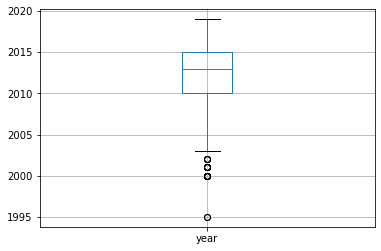

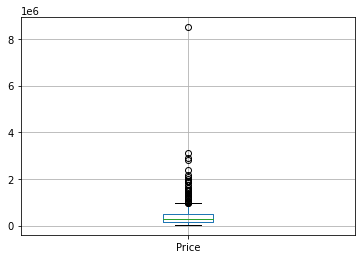

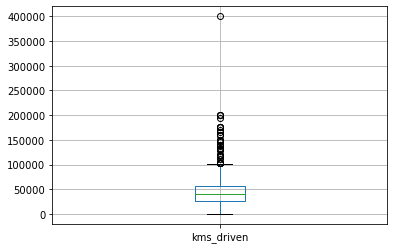

In [31]:
int_var=[]
for i in cars.columns:
    if cars.dtypes[i]=="int32":
        int_var.append(i)
    if cars.dtypes[i]=="float64":
        int_var.append(i)
print(int_var)

for i in int_var:
    cars.boxplot(column=i)
    plt.show()

year


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


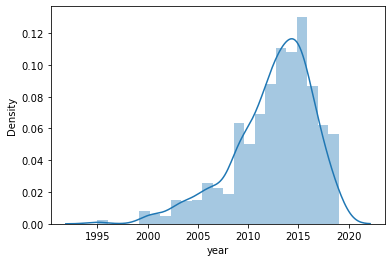

Price


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


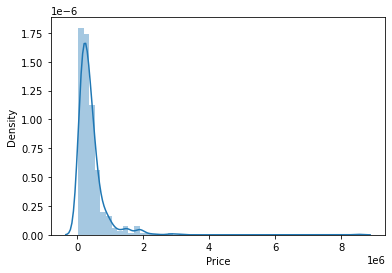

kms_driven


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


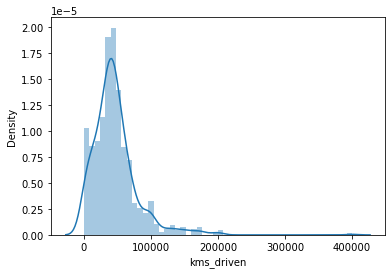

In [32]:
for i in int_var:
    print(i)
    sns.distplot(cars[i])
    plt.show()

### Removing Outliers

In [33]:
cars[cars["Price"]>6000000]

#Here we can see the outliers present.


,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [34]:
#Removing the outliers and considering cars below 60Lakhs
cars=cars[cars["Price"]<6000000].reset_index(drop=True)

In [35]:
cars[cars["kms_driven"]>200000]
#Here we can see the outliers present.

,name,company,year,Price,kms_driven,fuel_type
348,Honda City 1.5,Honda,2010,240000,400000,Petrol


In [36]:
#Removing the outliers and considering cars driven below 2Lakh kms
cars=cars[cars["kms_driven"]<200000].reset_index(drop=True)

In [37]:
cars

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
806,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
807,Tata Indica V2,Tata,2009,110000,30000,Diesel
808,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
809,Tata Zest XM,Tata,2018,260000,27000,Diesel


year


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


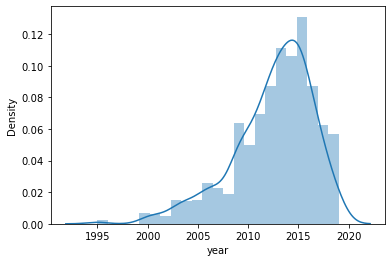

Price


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


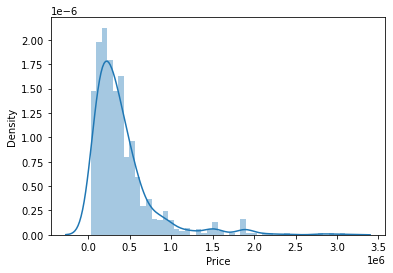

kms_driven


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


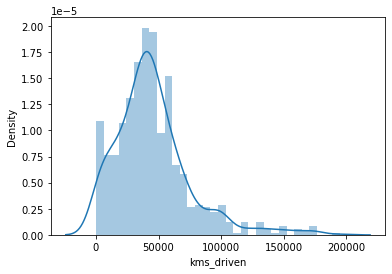

In [38]:
for i in int_var:
    print(i)
    sns.distplot(cars[i])
    plt.show()

## The data has been Cleaned.

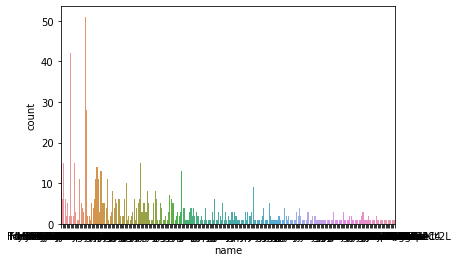

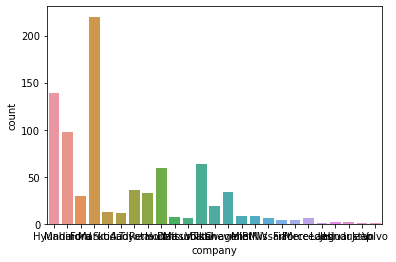

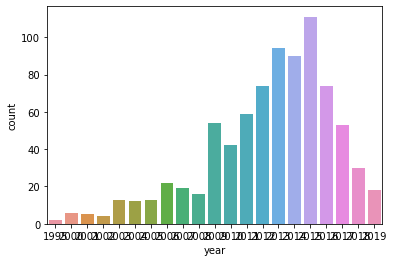

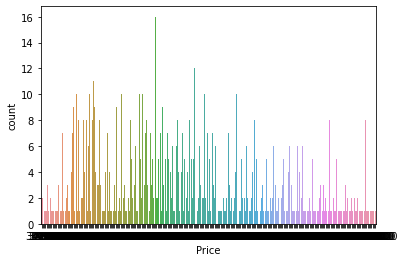

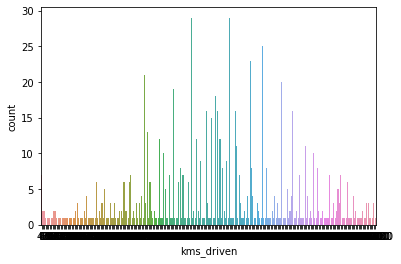

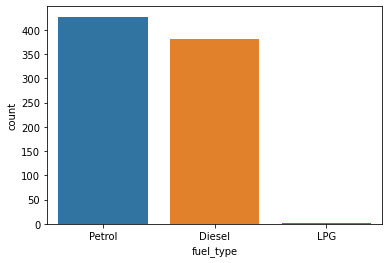

In [39]:
sns.countplot(x="name", data=cars)
plt.show()
sns.countplot(x="company", data=cars)
plt.show()
sns.countplot(x="year", data=cars)
plt.show()
sns.countplot(x="Price", data=cars)
plt.show()
sns.countplot(x="kms_driven", data=cars)
plt.show()
sns.countplot(x="fuel_type", data=cars)
plt.show()

In [40]:
#SAVING THE CLEAN DATA INTO NEW CSV FILE
cars.to_csv(r"C:\Users\hp\Downloads\Cleaned_Cars.csv")

## Model Selection stage

- We will analyse and choose the most suitable machine learning algorithm 
- that can accurately predict the car price based on the available features. 
- Algorithms used in car price prediction models include Regression models, Decision trees,KNN & Random Forest.
- Lasso and Ridge is used to check if we are getting better accuaracy.but we will not drop any of the variable.
- Based on the result and obsevations we have chosen Regression algorithm and is used to evaluated a test dataset.

In [41]:
cars.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

### Creating X and Y

In [42]:
X=cars.drop(columns="Price")
Y=cars["Price"]

#Creating X and Y using index accessing
# X = cars.values[:,0:-1] 
# Y = cars.values[:,-1]

In [43]:
print(X.shape)
print(Y.shape)

(811, 5)
(811,)


In [44]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
806,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
807,Tata Indica V2,Tata,2009,30000,Diesel
808,Toyota Corolla Altis,Toyota,2009,132000,Petrol
809,Tata Zest XM,Tata,2018,27000,Diesel


In [45]:
Y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
806    270000
807    110000
808    300000
809    260000
810    390000
Name: Price, Length: 811, dtype: int32

In [46]:
#split the data into test and train 
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)


In [47]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(648, 5)
(648,)
(163, 5)
(163,)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [49]:
# #Label Encoding & FIT TRANSFORM 

# #To check which variable is object type
# colname = []
# for x in cars.columns:
#     if cars[x].dtype=='object':
#         colname.append(x)
# colname

# # For Preprocessing the data
# from sklearn.preprocessing import LabelEncoder

# le=LabelEncoder()

# for x in colname:
#     cars[x]=le.fit_transform(cars[x])

In [50]:
#To convert Categorical values into Numeric using OneHotEncoder

ohe=OneHotEncoder()
ohe.fit(X[['name', 'company','fuel_type']])


OneHotEncoder()

In [51]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [52]:
#Column tranformer-Here we transforming columns by giving column name as input
#and remainder = passthrough means we are passing rest of columns as it is
#We can use simple imputer also to handle nan values but here we dont have nan values
#Categories is a parameter present on ohe
# we are passing all the categories here because there are chances that
#some values will be there in X test which are not present in X train.
#so that it will be aware of all the vlaues and will not throw error

column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name', 'company','fuel_type']),remainder="passthrough")

In [53]:
lr=LinearRegression()

In [54]:
#Data given to the pipeline will first go through the column thrasformation
#and then will be given to the linear regression
pipe=make_pipeline(column_trans,lr)

In [55]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [56]:
X_train.head()

,name,company,year,kms_driven,fuel_type
277,Mahindra Quanto C8,Mahindra,2013,37000,Diesel
226,Datsun GO T,Datsun,2016,7000,Petrol
532,Mahindra XUV500 W10,Mahindra,2018,40000,Diesel
119,Hyundai i20 Sportz,Hyundai,2011,33333,Diesel
260,Nissan Terrano XL,Nissan,2015,60000,Diesel


In [57]:
Y_pred=pipe.predict(X_test)

In [58]:
Y_pred

array([ 225883.25492208,  314658.56460189,  110125.985794  ,
        110125.985794  ,  380166.99420568,  563023.96170452,
        273991.55889456,  339404.384634  ,  632445.35141793,
         15719.19748357,  666085.93673204,  540494.10164258,
        489746.64643806,  337461.09055792,  126626.25239144,
        332844.28081234,  435404.81756625,  864635.33736558,
        543600.67751288,  303039.64773355,  409199.2845652 ,
        124479.0995828 , 1892475.24031681,  501368.926426  ,
        747232.73917899,  339827.03385922,  449570.55831687,
        408681.34625087,  511527.99400066,  232182.11403204,
        308181.19647959,   69410.8453341 ,  551184.02699123,
        188826.38165814,  500154.56037083,   60558.25426205,
        357435.70471865,  226230.71079446,  314595.85804857,
        250760.89287633,  374561.03198946,  138589.14774888,
        864635.33736558,  302428.56061089,  281744.90651648,
        498891.78788666,  456214.91165717,  325191.93901317,
        401528.35955891,

In [59]:
#USING R2 SCORE TO MEASURE LINEAR REGRESSION PROBLEM
r2_score(Y_test,Y_pred)

0.6650380615325077

## Observations 
- As we can see the data is comparatively less so we are getting less accuracy
- We can use different random state value to decide which gives better r2 score

In [60]:
#finding the best value of random state

scores=[]
for i in range(1000):
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,Y_train)
    Y_pred=pipe.predict(X_test)
    #print(r2_score(Y_test,Y_pred),i) #we will get different values of r2 score
    scores.append(r2_score(Y_test,Y_pred))
    

In [61]:
np.argmax(scores)

577

In [62]:
scores[np.argmax(scores)]

0.9011122684600785

In [63]:
score=pipe.score(X_train,Y_train)
print("The training accuracy of the linear Regresson model is ",score*100 )

The training accuracy of the linear Regresson model is  94.16247331734722


In [64]:
#Again traing model using the best random state

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)
r2_score(Y_test,Y_pred)

0.9011122684600785

In [65]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9011122684600785
RMSE: 122900.86297082168
Adj R-square: 0.9004980589474082


## r2 score for Linear Regression Model is 0.90. 
## Accuracy of Model is 90%

In [66]:
import pickle

In [67]:
#In pickle first we write down the name of the object that we want to dump here it is pipe
#Then we will open one file by giving path and name of that file
#wb is write binary mode.File will be open in write binary mode
pickle.dump(pipe,open(r"C:\Users\hp\Downloads\LinearRegressionModel.pkl","wb"))

### To predict we give the test data in the form of dataframe

In [68]:
#This is how we will predict one row

pipe.predict(pd.DataFrame([["Maruti Suzuki Swift","Maruti",2019,100,"Petrol"]],columns=['name', 'company', 'year','kms_driven', 'fuel_type']))

array([429120.79160763])

In [69]:
# Ridge & Lasso
from sklearn.linear_model import Lasso, Ridge

lasso=Lasso()

from sklearn.pipeline import make_pipeline

pipe1 = make_pipeline(column_trans,lasso)

pipe1.fit(X_train,Y_train)

Y_pred_lasso=pipe1.predict(X_test)
r2_score(Y_test,Y_pred_lasso)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538675280107.3623, tolerance: 9296958409.225243
  model = cd_fast.sparse_enet_coordinate_descent(


0.8409520940545945

In [70]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_lasso)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_lasso))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8409520940545945
RMSE: 155864.67665169254
Adj R-square: 0.839964218862387


In [71]:
ridge = Ridge()
pipe2 = make_pipeline(column_trans,ridge)

pipe2.fit(X_train,Y_train)

Y_pred_Ridge=pipe2.predict(X_test)
r2_score(Y_test,Y_pred_Ridge)

0.04602827668107534

In [72]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_Ridge)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_Ridge))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.04602827668107534
RMSE: 381725.7667924583
Adj R-square: 0.04010298647412547


### r2 score for Lasso Regression Model is 0.83 & Ridge is 0.04
### Accuracy of Lasso and Ridge Model is less than Linear Regression

## Decision Tree Model

In [73]:
from sklearn.tree import DecisionTreeRegressor
Dt=DecisionTreeRegressor(criterion="squared_error",random_state=10,splitter="best")
pipe3=make_pipeline(column_trans,Dt)
# fit the model 
pipe3.fit(X_train,Y_train)
Y_pred_DT=pipe3.predict(X_test)
r2_score(Y_test,Y_pred_DT)

0.7984922428464892

In [74]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred_DT)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_DT))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7984922428464892
RMSE: 175440.4003748567
Adj R-square: 0.7972406418703805


### r2 score for DecisionTreeRegressor Model is 0.79
### Accuracy of DT Model is less than Linear Regression

## KNN Model

In [75]:
np.sqrt(len(X_train))

25.45584412271571

In [76]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=26,metric="euclidean")

In [77]:
pipe4=make_pipeline(column_trans,knn)
pipe4.fit(X_train,Y_train)
Y_pred_KNN=pipe4.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred_KNN)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_KNN))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.15221620300693617
RMSE: 359853.95581081253
Adj R-square: 0.14695046513741405


In [78]:
my_dict={}
for K in range(3,25):
    knn=KNeighborsRegressor(n_neighbors=K,metric="euclidean")
    pipe5=make_pipeline(column_trans,knn)
    pipe5.fit(X_train,Y_train)
    Y_pred_KNN=pipe5.predict(X_test)
    print ("Rsquared is ", r2_score(Y_test,Y_pred_KNN), "for K-Value:",K)
    my_dict[K]=r2_score(Y_test,Y_pred_KNN)


Rsquared is  0.17317337130664046 for K-Value: 3
Rsquared is  0.2330743766267377 for K-Value: 4
Rsquared is  0.22728531322027468 for K-Value: 5
Rsquared is  0.2646584053615132 for K-Value: 6
Rsquared is  0.2591427969924557 for K-Value: 7
Rsquared is  0.24523893090664928 for K-Value: 8
Rsquared is  0.24750113211601799 for K-Value: 9
Rsquared is  0.26909037852952367 for K-Value: 10
Rsquared is  0.2689605663852026 for K-Value: 11
Rsquared is  0.2560764268910515 for K-Value: 12
Rsquared is  0.27311448459277154 for K-Value: 13
Rsquared is  0.25856214601312 for K-Value: 14
Rsquared is  0.24092967676005783 for K-Value: 15
Rsquared is  0.20330873736600696 for K-Value: 16
Rsquared is  0.21575541358087136 for K-Value: 17
Rsquared is  0.21729216092943504 for K-Value: 18
Rsquared is  0.22509608189134955 for K-Value: 19
Rsquared is  0.22166491360712737 for K-Value: 20
Rsquared is  0.2116801748034357 for K-Value: 21
Rsquared is  0.20981452439452075 for K-Value: 22
Rsquared is  0.18448756456449134 for

In [79]:
my_dict

{3: 0.17317337130664046,
 4: 0.2330743766267377,
 5: 0.22728531322027468,
 6: 0.2646584053615132,
 7: 0.2591427969924557,
 8: 0.24523893090664928,
 9: 0.24750113211601799,
 10: 0.26909037852952367,
 11: 0.2689605663852026,
 12: 0.2560764268910515,
 13: 0.27311448459277154,
 14: 0.25856214601312,
 15: 0.24092967676005783,
 16: 0.20330873736600696,
 17: 0.21575541358087136,
 18: 0.21729216092943504,
 19: 0.22509608189134955,
 20: 0.22166491360712737,
 21: 0.2116801748034357,
 22: 0.20981452439452075,
 23: 0.18448756456449134,
 24: 0.18047339149676533}

## As we can see the accuracy is very less so KNN is not suitable algorithm for this data.

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor
Rf=RandomForestRegressor(n_estimators=500,random_state=10,bootstrap=True,n_jobs=-1)

pipe6 =make_pipeline(column_trans,Rf)
pipe6.fit(X_train,Y_train)
Y_pred_RF=pipe6.predict(X_test)
    

In [81]:
r2=r2_score(Y_test,Y_pred_RF)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_RF))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8781813270719258
RMSE: 136408.25624071018
Adj R-square: 0.8774246893518756


## Bagging and Boosting

In [82]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
Rf=RandomForestRegressor(n_estimators=500,random_state=10,bootstrap=True,n_jobs=-1) 
Et=ExtraTreesRegressor(random_state=10, bootstrap=True)
Adboost=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=10),n_estimators=100,random_state=10)
grad_boost=GradientBoostingRegressor(n_estimators=300,random_state=10)
Xg_boost=XGBRegressor(n_estimators=300,random_state=10)


In [83]:
models=[Rf,Et,Adboost,grad_boost,Xg_boost]
for model in models:
    pipe3=make_pipeline(column_trans,model)
    pipe3.fit(X_train,Y_train)
    Y_pred=pipe3.predict(X_test)
    r2=r2_score(Y_test, Y_pred)
    adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
    score=pipe3.score(X_train,Y_train)
    print("The training of the ",type(model).__name__, " model is ",score*100 )
    print("The R squared error of the ",type(model).__name__, " model is ", r2*100 )
    print("The adjusted R squared error of the ",type(model).__name__, " model is ", adjusted_r_squared*100 )
    print("the RMSE of the ",type(model).__name__,"model is",rmse)
    print("/n")
    

The training of the  RandomForestRegressor  model is  94.49471693948509
The R squared error of the  RandomForestRegressor  model is  87.81813270719258
The adjusted R squared error of the  RandomForestRegressor  model is  87.74246893518756
the RMSE of the  RandomForestRegressor model is 136408.25624071018
/n
The training of the  ExtraTreesRegressor  model is  93.39191195003974
The R squared error of the  ExtraTreesRegressor  model is  87.94159910265343
The adjusted R squared error of the  ExtraTreesRegressor  model is  87.8667022026699
the RMSE of the  ExtraTreesRegressor model is 135715.22917693775
/n
The training of the  AdaBoostRegressor  model is  99.8245498915375
The R squared error of the  AdaBoostRegressor  model is  84.49860949467782
The adjusted R squared error of the  AdaBoostRegressor  model is  84.40232756607332
the RMSE of the  AdaBoostRegressor model is 153875.34996388864
/n
The training of the  GradientBoostingRegressor  model is  94.37417276938208
The R squared error of 

In [84]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
# create the sub models
estimators = []
model1= DecisionTreeRegressor(criterion='squared_error',random_state=10)
estimators.append(('tree', model1))
model2 = XGBRegressor(n_estimators=10000,random_state=10)
estimators.append(('XGB', model2))
model3=GradientBoostingRegressor(n_estimators=1000,max_depth=20,max_features=0.8,min_samples_leaf=1,min_samples_split=7,random_state=10)
estimators.append(('knn', model3))
model4=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=10),n_estimators=1000,random_state=10)
estimators.append(("Adaboost",model4))
model5=RandomForestRegressor(n_estimators=500,random_state=10,bootstrap=True,n_jobs=-1) 
estimators.append(("Random_Forest",model4))
print(estimators)
# create the ensemble model
ensemble = VotingRegressor(estimators)
pipe4=make_pipeline(column_trans,ensemble)
pipe4.fit(X_train,Y_train)
Y_pred=pipe4.predict(X_test)
#print(Y_pred)

[('tree', DecisionTreeRegressor(random_state=10)), ('XGB', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)), ('knn', GradientBoostingRegressor(max_depth=20, max_features=0.8, min_samples_split=7,
                          n_estimators=1000, random_state=10)), ('Adaboost', AdaBoostRegressor(base_estimator=D

In [85]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8891935083694851
RMSE: 130096.71404390123
Adj R-square: 0.8885052692910347


### Conclusion

- As we have observed Linear Regression Model is giving highest accuracy score that is 90%
- so we have concluded that Linesr Regression Model is the best suitable algorithm for given data